# <Center> IDS 575_Machine Learning and Statistical Analysis</Center>

## <CENTER>Final Project - Divvy Bike Ride  Prediction<CENTER>

## Presented by - <br>

**Harshita Puraswani** - 653670536 <br>


# Introduction

### Divvy bicycles is a bike share system available for rent across Chicago which offers ease of access to a wide range of customers. Our project focuses on predicting Divvy Bike rides in the city of Chicago during 2022. We acquired the data from the Divvy bicycles’ official website and merged the daily weather data from NOAA (National Oceanic and Atmospheric Administration) website.The objective of the project is to build a predictive model using historical data and analyze it with the impact of weather conditions such as temperature, snow etc. Using various models, we can leverage data for predicting duration of future divvy rides.

### There are 4 component of our project -

1. Data Preprocessing
2. Exploratory Data Analysis
3. Model Implementation
4. Conclusion

# Data Preprocessing

In [1]:
#Importing Weather Data

import pandas as pd
import numpy as np

weather1 = pd.read_excel("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/2021_Weather.xlsx")

In [2]:
weather1.head()

,Date,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2021-01-01,31.9,27.2,83.0,13.1,29.3,0.00
1,2021-01-02,33.4,29.3,85.0,7.5,29.4,0.24
2,2021-01-03,31.9,28.1,85.7,6.0,29.3,0.05
3,2021-01-04,27.4,24.6,88.9,8.5,29.3,0.00
4,2021-01-05,32.7,27.3,80.8,5.8,29.4,0.00


In [3]:
df = pd.DataFrame(weather1)

In [4]:
#V Weather variables type
print(df.dtypes)

Date                  datetime64[ns]
Temperature (° F)             object
Dew Point (° F)               object
Humidity (%)                  object
Wind Speed (mph)              object
Pressure (Hg)                 object
Precipitation (in)            object
dtype: object


In [5]:
#converting float values to integer 

df['Pressure (Hg)'] = df['Pressure (Hg)'].fillna(0).astype(float).astype(int)
df['Wind Speed (mph)'] = df['Wind Speed (mph)'].fillna(0).astype(float).astype(int)
df['Humidity (%)'] = df['Humidity (%)'].fillna(0).astype(float).astype(int)
df['Dew Point (° F)'] = df['Dew Point (° F)'].fillna(0).astype(float).astype(int)
df['Temperature (° F)'] = df['Temperature (° F)'].fillna(0).astype(float).astype(int)
df['Precipitation (in)'] = df['Precipitation (in)'].fillna(0).astype(float).astype(int)



In [6]:
df.head()

,Date,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in)
0,2021-01-01,31,27,83,13,29,0
1,2021-01-02,33,29,85,7,29,0
2,2021-01-03,31,28,85,6,29,0
3,2021-01-04,27,24,88,8,29,0
4,2021-01-05,32,27,80,5,29,0


In [7]:
df['Date']=df['Date'].dt.strftime('%#m/%#d/%Y')

In [8]:
df.dtypes

Date                  object
Temperature (° F)      int32
Dew Point (° F)        int32
Humidity (%)           int32
Wind Speed (mph)       int32
Pressure (Hg)          int32
Precipitation (in)     int32
dtype: object

In [9]:
#Importing Divvy Bike ride data

from datetime import datetime

dft1 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202101-divvy-tripdata.csv")
dft2 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202102-divvy-tripdata.csv")
dft3 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202103-divvy-tripdata.csv")
dft4 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202104-divvy-tripdata.csv")
dft5 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202105-divvy-tripdata.csv")
dft6 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202106-divvy-tripdata.csv")
dft7 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202107-divvy-tripdata.csv")
dft8 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202108-divvy-tripdata.csv")
dft9 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202109-divvy-tripdata.csv")
dft10 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202110-divvy-tripdata.csv")
dft11 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202111-divvy-tripdata.csv")
dft12 = pd.read_csv("C:/Users/hpuras2/OneDrive - University of Illinois at Chicago/machine learning/Final Project/Data Set Divvy Bike 2021/Data Set Divvy Bike 2021/202112-divvy-tripdata.csv")


C:\Users\hpuras2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#Concatening all the excels into one dataframe

frames1 = [dft1, dft2, dft3, dft4, dft5, dft6, dft7, dft8, dft9, dft10, dft11, dft12]
dft = pd.concat(frames1)
dft.head()

,ride_id,rideable_type,started_at_date,ended_at_date,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Distance,Distance
0,E19E6F1B8D4C42ED,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,1.393873736,NaN
1,DC88F20C2C55F27F,electric_bike,27/01/21,27/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0.345836307,NaN
2,EC45C94683FE3F27,electric_bike,21/01/21,21/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0.174079064,NaN
3,4FA453A75AE377DB,electric_bike,7/1/2021,7/1/2021,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,1.397582418,NaN
4,BE5E8EB4E7263A0B,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.171418804,NaN


In [11]:
dft = dft.iloc[: , :-1]
dft.head()

,ride_id,rideable_type,started_at_date,ended_at_date,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Distance
0,E19E6F1B8D4C42ED,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,1.393873736
1,DC88F20C2C55F27F,electric_bike,27/01/21,27/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0.345836307
2,EC45C94683FE3F27,electric_bike,21/01/21,21/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0.174079064
3,4FA453A75AE377DB,electric_bike,7/1/2021,7/1/2021,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,1.397582418
4,BE5E8EB4E7263A0B,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.171418804


In [12]:
dft.dtypes

ride_id                object
rideable_type          object
started_at_date        object
ended_at_date          object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Distance               object
dtype: object

In [13]:
dft.rename(columns = {'started_at_date':'Date'}, inplace = True)
dft.rename(columns = {'Distance ':'Dist'}, inplace = True)
dft.head()

,ride_id,rideable_type,Date,ended_at_date,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Dist
0,E19E6F1B8D4C42ED,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,1.393873736
1,DC88F20C2C55F27F,electric_bike,27/01/21,27/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0.345836307
2,EC45C94683FE3F27,electric_bike,21/01/21,21/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0.174079064
3,4FA453A75AE377DB,electric_bike,7/1/2021,7/1/2021,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,1.397582418
4,BE5E8EB4E7263A0B,electric_bike,23/01/21,23/01/21,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0.171418804


# Exploratory Data Analysis

In [16]:
dft['Date'] = pd.to_datetime(dft['Date'])
dft['Date']=dft['Date'].dt.strftime('%#m/%#d/%Y')

In [17]:
#Merging both datasets into final dataset

dataset = pd.merge(df, dft, on="Date")

In [18]:
dataset.dtypes

Date                   object
Temperature (° F)       int32
Dew Point (° F)         int32
Humidity (%)            int32
Wind Speed (mph)        int32
Pressure (Hg)           int32
Precipitation (in)      int32
ride_id                object
rideable_type          object
ended_at_date          object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Dist                   object
dtype: object

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

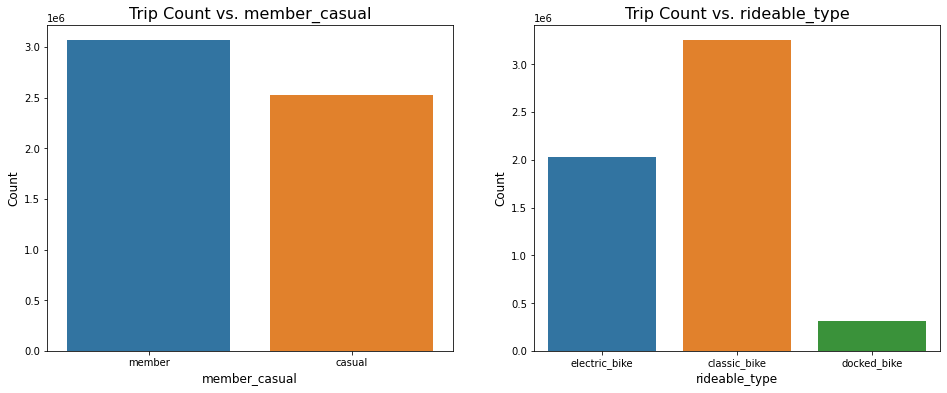

In [20]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='member_casual', data=dataset, ax=ax[0])
ax[0].set_title('Trip Count vs. member_casual', fontsize=16)
ax[0].set_xlabel('member_casual', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.countplot(x='rideable_type', data=dataset, ax=ax[1])
ax[1].set_title('Trip Count vs. rideable_type', fontsize=16)
ax[1].set_xlabel('rideable_type', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
plt.show()

### We analyze the ride details by visualizing the count of Divvy customers having membership vs casual accounts. We also compare the count of electric, classic and docked rideable types. From the 'Trip count vs member_casual' graph we can see that most customers have a membership. 

### From the 'Trip Count vs rideable_type' graph we can see that most riders ride a classic bike, followed by electric_bike. Docked bike ride type have the least riders.

In [21]:
dft['Date'] = pd.to_datetime(dft['Date'])
dft['Date']

dft['Month'] = dft['Date'].dt.month
dft['Month']

dft['Month'] = dft['Month'].apply(lambda x : 'January' if x==1
                                            else('February' if x==2 
                                            else('March' if x==3 
                                            else('April' if x==4 
                                            else('May' if x==5 
                                            else('June' if x==6 
                                            else('July' if x==7 
                                            else('August' if x==8 
                                            else('September' if x==9 
                                            else('October' if x==10 
                                            else('November' if x==11 
                                            else('December' if x==12 else 'no'))))))))))))
print(dft['Month'].head(10))

0      January
1      January
2      January
3         July
4      January
5    September
6        April
7      January
8    September
9      January
Name: Month, dtype: object


In [22]:
dft['Season'] = dft['Month'].apply(lambda x : 'Winter' if x == 'December'
                                                else('Winter' if x == 'January' 
                                                else('Winter' if x == 'February' 
                                                else('Spring' if x == 'March'
                                                else('Spring' if x == 'April' 
                                                else('Spring' if x=='May' 
                                                else('Summer' if x=='June' 
                                                else('Summer' if x=='July' 
                                                else('Summer' if x=='August' 
                                                else('Fall' if x=='September' 
                                                else('Fall' if x=='October' 
                                                else('Fall' if x=='November' else 'no'))))))))))))
dft['Season'].head(10)

0    Winter
1    Winter
2    Winter
3    Summer
4    Winter
5      Fall
6    Spring
7    Winter
8      Fall
9    Winter
Name: Season, dtype: object

<AxesSubplot:title={'center':'Rides per Season'}, xlabel='Season', ylabel='Number of rides'>

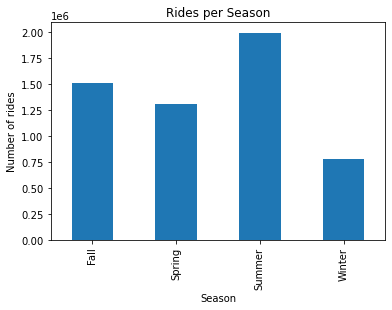

In [23]:
c = dft.groupby("Season").size() 
plt.ylabel("Number of rides")
plt.xlabel("Seasons")
plt.title("Rides per Season")
c.plot.bar()


### Here we visualize the seasons with the most number of rides.  From the bar plot we can see that most rides occur in summer. The main reason behind this can be the most convenient temperature of the season to ride by users.

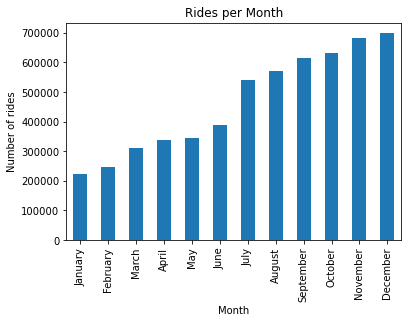

In [24]:
d = dft.groupby("Month").size().sort_values(ascending = True) 
plt.ylabel("Number of rides")
plt.xlabel("Months")
plt.title("Rides per Month")
d.plot.bar()
d1= plt.xticks(ticks = list(range(12)), labels = ['January', 'February', \
                                                  'March', 'April', 'May', 'June', \
                                                  'July','August','September','October','November','December'])

### From the above bar plot we can see that, though the most number of rides occur in the summer term, the month with most rides is december. For the bar plot ‘Rides per season’ we have summer with highest rides as it is the aggregate of rides occurring in June, July and August.

Text(0, 0.5, 'Count')

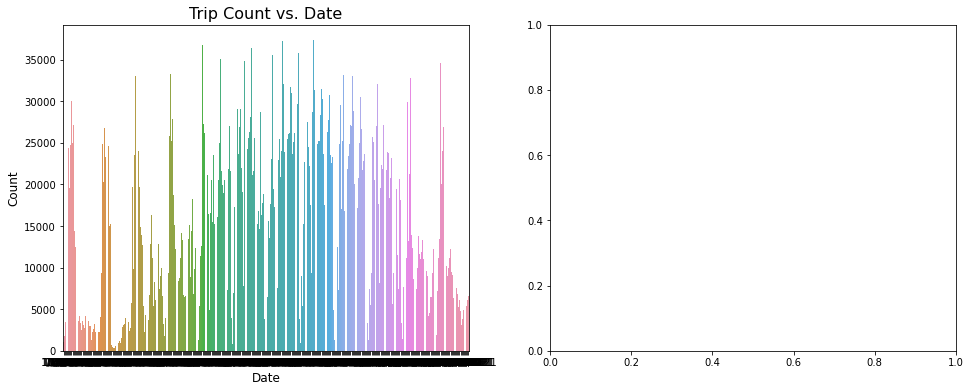

In [25]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='Date', data=dataset, ax=ax[0])
ax[0].set_title('Trip Count vs. Date', fontsize=16)
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

### Here we visualize the yearly trend of all the rides. We can see that there is a bell curve formed with most rides in summer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


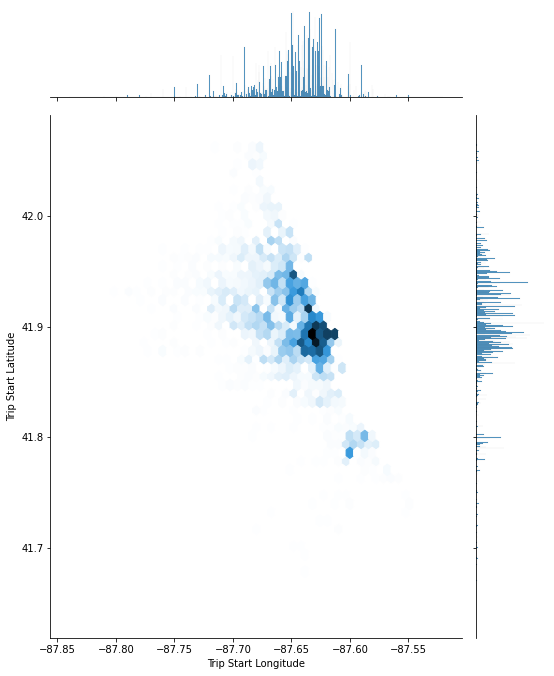

In [52]:
# trip start longitude and latitude distribution
g = sns.jointplot('start_lng', 'start_lat', data=dataset, kind='hex')
g.set_axis_labels('Trip Start Longitude', 'Trip Start Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

### We do a jointplot to analyze the location where the most number of rides start.


C:\Users\hpuras2\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


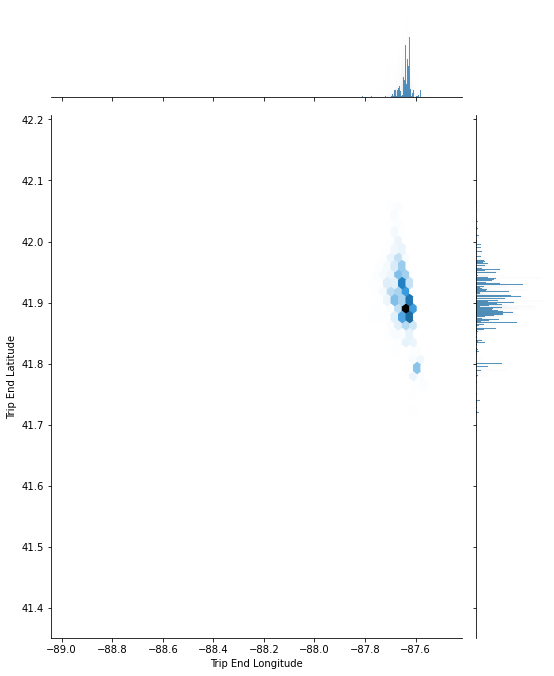

In [26]:
# trip end longitude and latitude distribution
g = sns.jointplot('end_lng', 'end_lat', data=dataset, kind='hex')
g.set_axis_labels('Trip End Longitude', 'Trip End Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

### We do a jointplot to analyze the location where the most number of rides end.


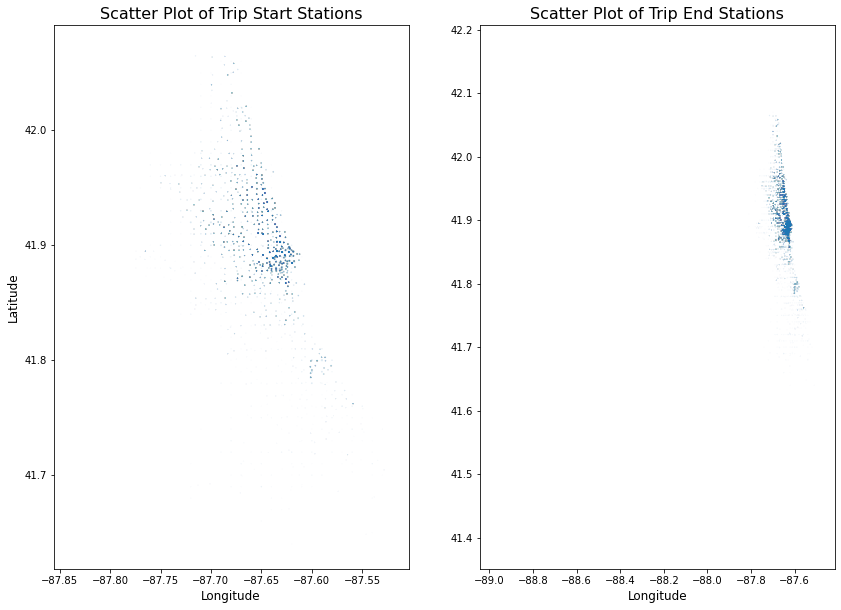

In [27]:
# group station according GPS locations
station_start = dataset[['start_lng', 'start_lat', 'Dist']]
station_start = station_start.groupby(['start_lng', 'start_lat'])
station_start = station_start.count().reset_index()

station_end = dataset[['end_lng', 'end_lat', 'Dist']]
station_end = station_end.groupby(['end_lng', 'end_lat'])
station_end = station_end.count().reset_index()

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
x = station_start['start_lng']
y = station_start['start_lat']
s = station_start['Dist'] / 200
ax[0].scatter(x, y, s=s, alpha=0.1)
ax[0].set_title('Scatter Plot of Trip Start Stations', fontsize=16)
ax[0].set_xlabel('Longitude', fontsize=12)
ax[0].set_ylabel('Latitude', fontsize=12)

x = station_end['end_lng']
y = station_end['end_lat']
s = station_end['Dist'] / 200
ax[1].scatter(x, y, s=s, alpha=0.1)
ax[1].set_title('Scatter Plot of Trip End Stations', fontsize=16)
ax[1].set_xlabel('Longitude', fontsize=12)

plt.show()

### We perform a scatter plot of the start and end stations of the trip to visualize the most active station locations.

In [30]:
dataset["Dist"] = pd.to_numeric(dataset["Dist"], errors='coerce').fillna(0, downcast='infer')
dataset.dtypes

Date                   object
Temperature (° F)       int32
Dew Point (° F)         int32
Humidity (%)            int32
Wind Speed (mph)        int32
Pressure (Hg)           int32
Precipitation (in)      int32
ride_id                object
rideable_type          object
ended_at_date          object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
Dist                  float64
dtype: object

In [31]:
dataset.head()

,Date,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in),ride_id,rideable_type,ended_at_date,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Dist
0,1/1/2021,31,27,83,13,29,0,B10BAB2E3B46716A,electric_bike,1/1/2021,2112 W Peterson Ave,KA1504000155,Marine Dr & Ainslie St,KA1504000171,41.991182,-87.683566,41.971659,-87.650130,member,2.184676
1,1/1/2021,31,27,83,13,29,0,94E2046B2055E078,electric_bike,1/1/2021,Sedgwick St & North Ave,TA1307000038,Mies van der Rohe Way & Chicago Ave,13338,41.911436,-87.638623,41.896914,-87.622159,member,1.313379
2,1/1/2021,31,27,83,13,29,0,B0F89673DD6E80B3,classic_bike,1/1/2021,Clark St & Wrightwood Ave,TA1305000014,Wilton Ave & Diversey Pkwy,TA1306000014,41.929546,-87.643118,41.932418,-87.652705,member,0.531475
3,1/1/2021,31,27,83,13,29,0,2AE7AD0E6FE992F9,classic_bike,1/1/2021,Greenview Ave & Fullerton Ave,TA1307000001,Wilton Ave & Diversey Pkwy,TA1306000014,41.925330,-87.665800,41.932418,-87.652705,member,0.832796
4,1/1/2021,31,27,83,13,29,0,A90D3CB6CAF6CA02,classic_bike,2/1/2021,St. Clair St & Erie St,13016,State St & Pearson St,TA1307000061,41.894345,-87.622798,41.897448,-87.628722,member,0.372688


In [39]:
#Dropping variables which are not important for the analysis
#dataset.drop("Month", axis=1, inplace=True)
#dataset.drop("Season", axis=1, inplace=True)
dataset.drop("ride_id", axis=1, inplace=True)
dataset.drop("rideable_type", axis=1, inplace=True)
dataset.drop("ended_at_date", axis=1, inplace=True)
dataset.drop("end_station_name", axis=1, inplace=True)
dataset.drop("end_station_id", axis=1, inplace=True)
dataset.drop("member_casual", axis=1, inplace=True)
dataset.drop("start_station_name", axis=1, inplace=True)
dataset.drop("start_station_id", axis=1, inplace=True)

In [40]:
dataset.head()

,Date,Temperature (° F),Dew Point (° F),Humidity (%),Wind Speed (mph),Pressure (Hg),Precipitation (in),start_lat,start_lng,end_lat,end_lng,Dist
0,1/1/2021,31,27,83,13,29,0,41.991182,-87.683566,41.971659,-87.650130,2.184676
1,1/1/2021,31,27,83,13,29,0,41.911436,-87.638623,41.896914,-87.622159,1.313379
2,1/1/2021,31,27,83,13,29,0,41.929546,-87.643118,41.932418,-87.652705,0.531475
3,1/1/2021,31,27,83,13,29,0,41.925330,-87.665800,41.932418,-87.652705,0.832796
4,1/1/2021,31,27,83,13,29,0,41.894345,-87.622798,41.897448,-87.628722,0.372688


# Model Implementation

## Implementing XGboost

### We have performed the XGboost which is an effective ensemble learning method to do predictions. We also tried Logistic regression and random forest before, but they gave bad performances. Random forest will be easily overfitting and Logistic Regression has fairly low accuracy. However, XGboost can combine many weak learners together to improve accuracy and add regularization to avoid overfitting. Therefore, XGboost is a good choice for our problem.

In [32]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


In [41]:
dataset.drop("Date", axis=1, inplace=True)
#dataset.drop("Month", axis=1, inplace=True)
#dataset.drop("Season", axis=1, inplace=True)


In [42]:
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [43]:
dataset_dmatrix = xgb.DMatrix(data=X,label=y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [45]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [46]:
# from sklearn.metrics import confusion_matrix

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
# print(confusion_matrix(y_true, y_pred))


[22:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 24.654277


In [48]:
#k-fold Cross Validation using XGBoost

In [49]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=dataset_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=4834)

[22:53:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [50]:
#cv_results contains train and test RMSE metrics for each boosting round.

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,26.154505,0.624072,26.144856,1.267242
1,25.877125,0.767998,25.908370,1.221601
2,25.548843,0.695485,25.587872,1.293409
3,25.456828,0.751402,25.566488,1.281779
4,25.358011,0.622501,25.476020,1.398831


In [51]:
print((cv_results["test-rmse-mean"]).tail(1))

# We have reach an even lower RMSE for a different set of hyper-parameters.

49    20.986808
Name: test-rmse-mean, dtype: float64


In [52]:
xg_reg = xgb.train(params=params, dtrain=dataset_dmatrix, num_boost_round=10)


[22:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


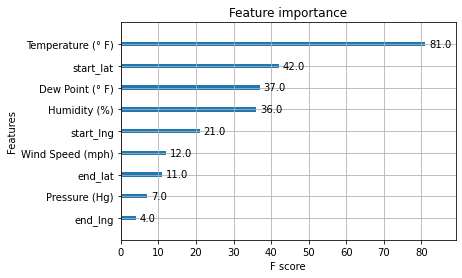

In [53]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### We can conclude that temperature variable has greatest impact on trips.